In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# minimal plot style
plt.rcParams['figure.figsize'] = [10, 5]

# 03/06
Forse è meglio usare le date per nominare le varie prese dati e usare varie etichette per selezionarli in seguito. Le etichette più rilevanti sono:

- type>
    -   pc: photonic crystal
    -   air
    -   si [opt: height]: silica
    -   cal> calibration
- date
- LNA> on/off
- span (MHz)
- antenna> HF, LF, CAB (cavo in presa diretta)

L'unico problema è che le misure che abbiamo preso sono delle medie e non ci forniscono dati sulla variazione standard. Nel nome del file comparirà se il contenuto è una media oppure no.

In [3]:
# df = pd.read_csv('LF_LNA_SIL_R0.txt')

# date = '30-05-24'
# run = '_R6'

# df['Span (MHz)'] = 25
# df['Date'] = pd.to_datetime(date)
# df['Type'] = 'SI'
# df['LNA'] = True
# df['Antenna'] = 'LF'
# print(df)
# df.to_csv(date + run +'.csv', encoding='utf8', index=False)

In [8]:
def read_data_date(date, n_items):
    '''
    # Read all the measurements of a date
    
    date: the date of the measurements  '30/05/24'
    n_items: read from 1 to n_items 
    '''
    date = str.replace(date, '/', '-')
    run = '_R'
    df = pd.read_csv(date + run + str(1) + '.csv')
    for i in range(2, n_items):
        df = pd.concat([df, pd.read_csv(date + run + str(i + 1) + '.csv')],ignore_index=True )
    return df

df = read_data_date('30/05/24', 7)
df


,Frequency (GHz),Peak (mV),Noise (mV),Date,Type,Span (MHz),LNA,Antenna,# Frequency (GHz)
0,0.250000,17.000,0.2970,2024-05-30,PC,10,False,LF,NaN
1,0.552632,28.500,0.4560,2024-05-30,PC,10,False,LF,NaN
2,0.855263,32.300,0.4830,2024-05-30,PC,10,False,LF,NaN
3,1.157890,16.500,0.2590,2024-05-30,PC,10,False,LF,NaN
4,1.460530,2.060,0.0394,2024-05-30,PC,10,False,LF,NaN
...,...,...,...,...,...,...,...,...,...
345,5.530610,0.479,0.3030,2024-05-30,PC,25,True,LF,NaN
346,5.647960,0.554,0.3200,2024-05-30,PC,25,True,LF,NaN
347,5.765310,0.650,0.3540,2024-05-30,PC,25,True,LF,NaN
348,5.882650,0.619,0.3740,2024-05-30,PC,25,True,LF,NaN


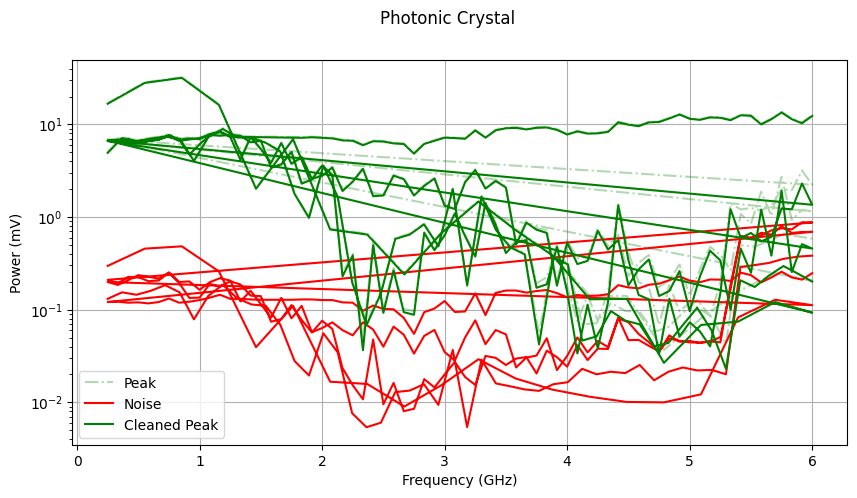

In [9]:
fig, ax = plt.subplots()
fig.suptitle('Photonic Crystal')
ax.grid(True)

ax.plot(df['Frequency (GHz)'],
        df['Peak (mV)'], 'g-.', label='Peak', alpha=0.3)
ax.plot(df['Frequency (GHz)'],
        df['Noise (mV)'], 'r-', label='Noise')
ax.plot(df['Frequency (GHz)'] ,
        df['Peak (mV)'] - df['Noise (mV)'], 'g-', label='Cleaned Peak')

# set y scale to logarithmic
ax.set_yscale('log')
ax.set_xlabel('Frequency (GHz)')
ax.set_ylabel('Power (mV)')
ax.legend()

NameError: name 'LNAPCR1' is not defined

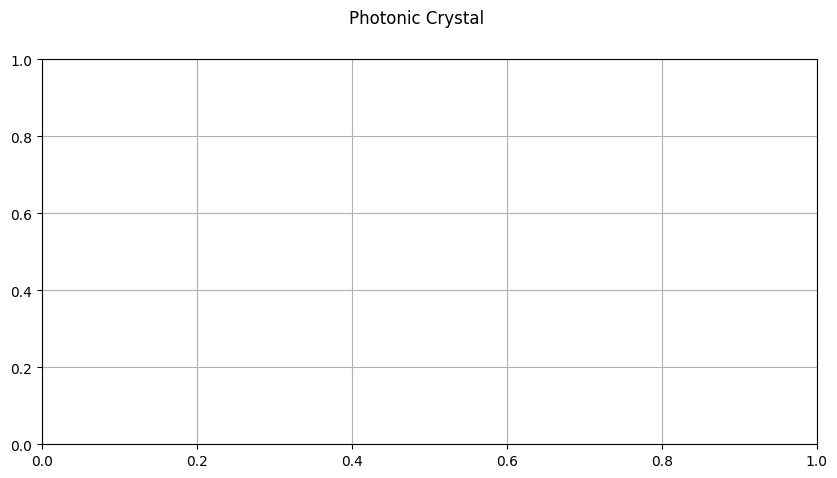

In [6]:
fig, ax = plt.subplots()
fig.suptitle('Photonic Crystal')
ax.grid(True)

def plot(df, ax, num):
    ax.plot(df['Frequency (GHz)'] ,
            df['Peak (mV)'] - df['Noise (mV)'], '-', label='Cleaned Peak ' + str(num))

# plot(LNAPCR0, ax, 0)
plot(LNAPCR1, ax, 1)
plot(LNAPCR2, ax, 2)
plot(LFAIRR0, ax, 3)

# set y scale to logarithmic
# ax.set_yscale('log')
ax.set_xlabel('Frequency (GHz)')
ax.set_ylabel('Power (mV)')
ax.legend()

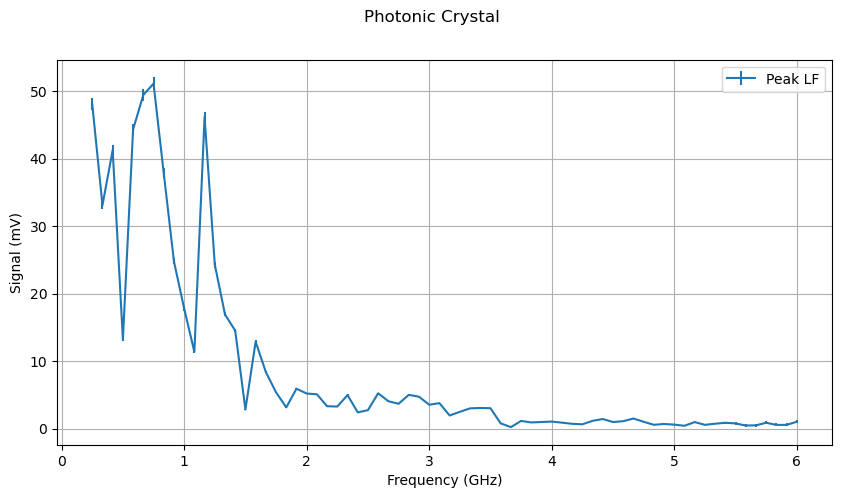

In [ ]:
bdata = pd.read_csv('LF_AIR_R0.txt')
fig, ax = plt.subplots()
fig.suptitle('Photonic Crystal')
ax.grid(True)

# plot(LNAPCR0, ax, 0)
plt.errorbar(data['Frequency (GHz)'], data['Peak (mV)'], yerr=data['Noise (mV)'], fmt='-', label='Peak LF')

# set y scale to logarithmic
# ax.set_yscale('log')
ax.set_xlabel('Frequency (GHz)')
ax.set_ylabel('Signal (mV)')
ax.legend()

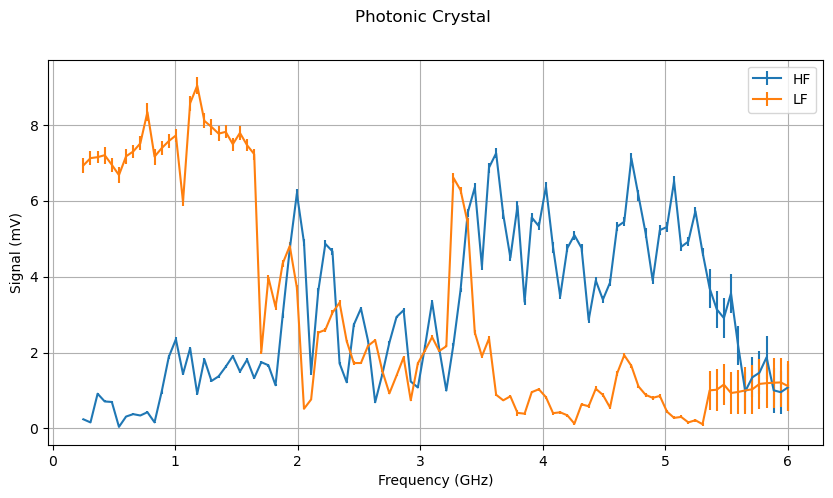

In [ ]:
data = pd.read_csv('LF_LNA_SIL_R1.txt')
data1 = pd.read_csv('LF_LNA_SIL_R2.txt')
data2 = pd.read_csv('LF_LNA_AIR_R5.txt')
data3 = pd.read_csv('HF_LNA_AIR_R7.txt')
fig, ax = plt.subplots()
fig.suptitle('Photonic Crystal')
ax.grid(True)

def pplot(data, label):
    plt.errorbar(data['Frequency (GHz)'], data['Peak (mV)'], yerr=data['Noise (mV)'], fmt='-', label=label)

# plot(LNAPCR0, ax, 0)

pplot(data3, "HF")
pplot(data2, "LF")

# set y scale to logarithmic
# ax.set_yscale('log')
ax.set_xlabel('Frequency (GHz)')
ax.set_ylabel('Signal (mV)')
ax.legend()

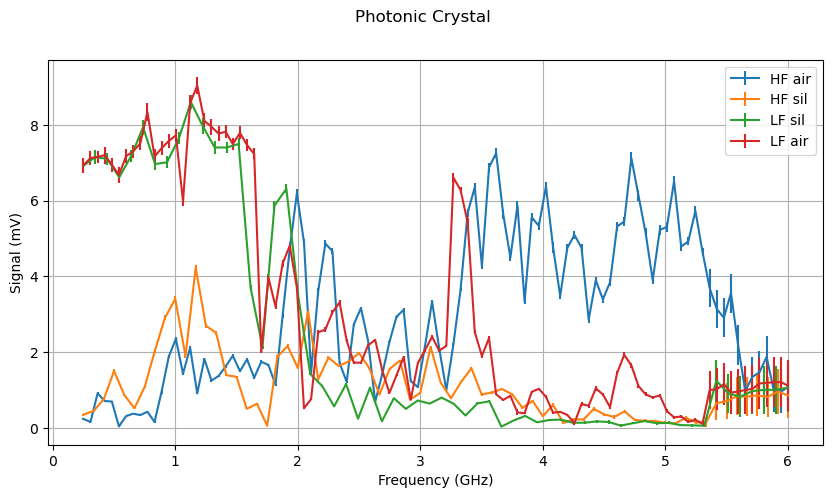

In [ ]:
data = pd.read_csv('HF_LNA_AIR_R7.txt')
data1 = pd.read_csv('HF_LNA_SIL_R8.txt')
data2 = pd.read_csv('LF_LNA_SIL_R2.txt')
data3 = pd.read_csv('LF_LNA_AIR_R5.txt')

fig, ax = plt.subplots()
fig.suptitle('Photonic Crystal')
ax.grid(True)

def pplot(data, label):
    plt.errorbar(data['Frequency (GHz)'], data['Peak (mV)'], yerr=data['Noise (mV)'], fmt='-', label=label)

# plot(LNAPCR0, ax, 0)

pplot(data, "HF air")
pplot(data1, "HF sil")
pplot(data2, "LF sil")
pplot(data3, "LF air")

# set y scale to logarithmic
# ax.set_yscale('log')
ax.set_xlabel('Frequency (GHz)')
ax.set_ylabel('Signal (mV)')
ax.legend()

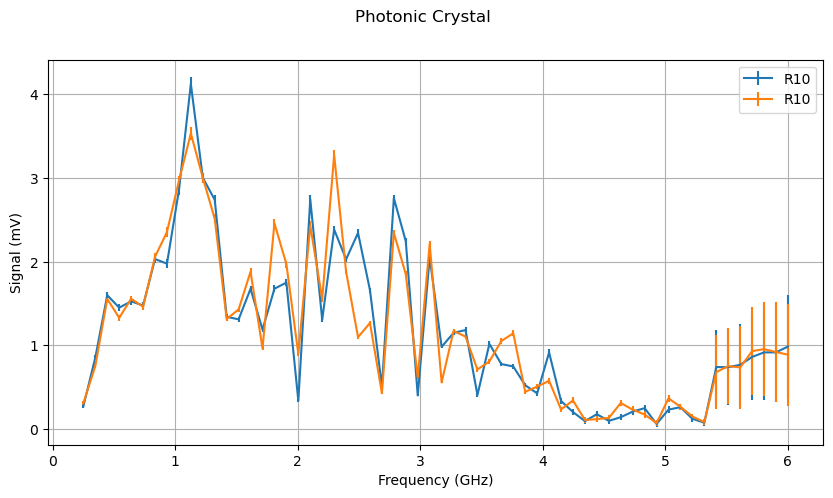

In [ ]:
data1 = pd.read_csv('HF_LNA_SIL_R8.txt')
data2 = pd.read_csv('HF_LNA_SIL_R9.txt')
data3 = pd.read_csv('HF_LNA_SIL_R10.txt')
data4 = pd.read_csv('HF_LNA_SIL_R11.txt')


fig, ax = plt.subplots()
fig.suptitle('Photonic Crystal')
ax.grid(True)

def pplot(data, label):
    plt.errorbar(data['Frequency (GHz)'], data['Peak (mV)'], yerr=data['Noise (mV)'], fmt='-', label=label)

# plot(LNAPCR0, ax, 0)

# pplot(data, "R8")
#pplot(data1, "R9")
pplot(data2, "R10")
pplot(data3, "R10")
#pplot(data4, "R10")

# set y scale to logarithmic
# ax.set_yscale('log')
ax.set_xlabel('Frequency (GHz)')
ax.set_ylabel('Signal (mV)')
ax.legend()

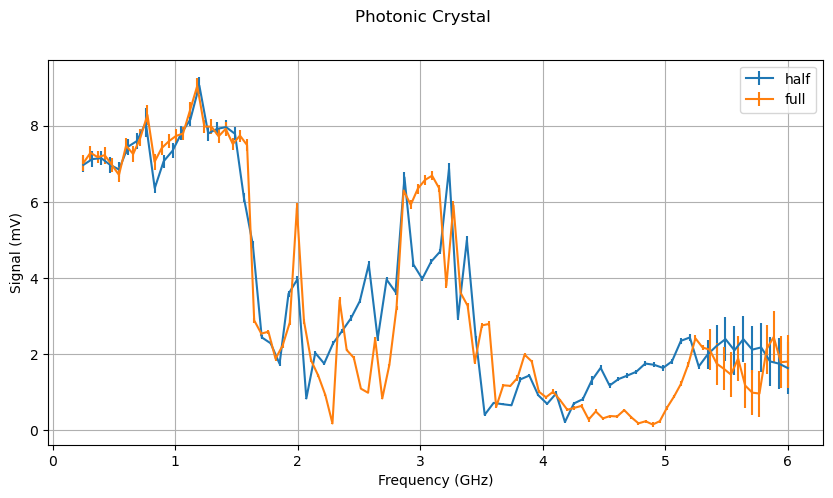

In [ ]:
data = pd.read_csv('HF_LNA_SIL_R11.txt')
data1 = pd.read_csv('HF_LNA_SIL_R13.txt')
data2 = pd.read_csv('LF_LNA_SIHALF_R15.txt')
data3 = pd.read_csv('LF_LNA_SIFULL_R16.txt')


fig, ax = plt.subplots()
fig.suptitle('Photonic Crystal')
ax.grid(True)

def pplot(data, label):
    plt.errorbar(data['Frequency (GHz)'], data['Peak (mV)'], yerr=data['Noise (mV)'], fmt='-', label=label)

# plot(LNAPCR0, ax, 0)

# pplot(data, "R11")
# pplot(data1, "R13")
pplot(data2, "half")
pplot(data3, "full")


# set y scale to logarithmic
# ax.set_yscale('log')
ax.set_xlabel('Frequency (GHz)')
ax.set_ylabel('Signal (mV)')
ax.legend()

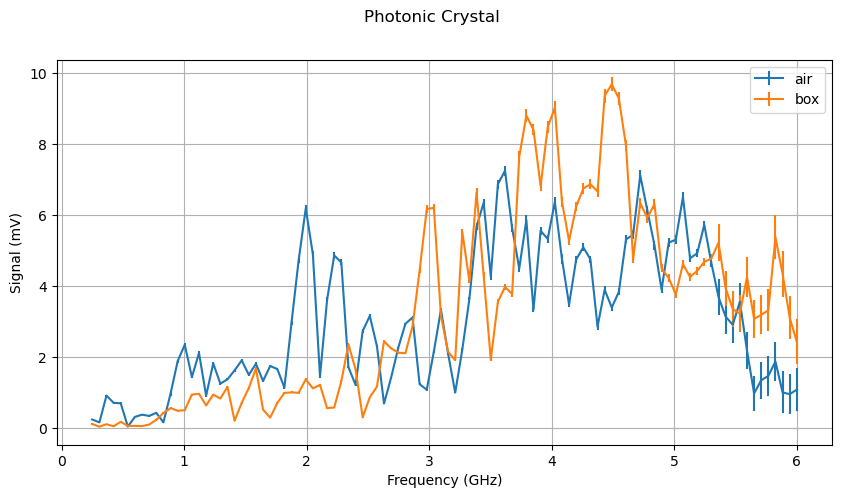

In [ ]:
data = pd.read_csv('HF_LNA_AIR_R7.txt')
data1 = pd.read_csv('HF_LNA_SIHALF_R14.txt')
data2 = pd.read_csv('HF_LNA_SIFULL_R17.txt')
data3 = pd.read_csv('HF_LNA_BOX_R18.txt')


fig, ax = plt.subplots()
fig.suptitle('Photonic Crystal')
ax.grid(True)

def pplot(data, label):
    plt.errorbar(data['Frequency (GHz)'], data['Peak (mV)'], yerr=data['Noise (mV)'], fmt='-', label=label)

# plot(LNAPCR0, ax, 0)

pplot(data, "air")
# pplot(data1, "half")
# pplot(data2, "full")
pplot(data3, "box")


# set y scale to logarithmic
# ax.set_yscale('log')
ax.set_xlabel('Frequency (GHz)')
ax.set_ylabel('Signal (mV)')
ax.legend()

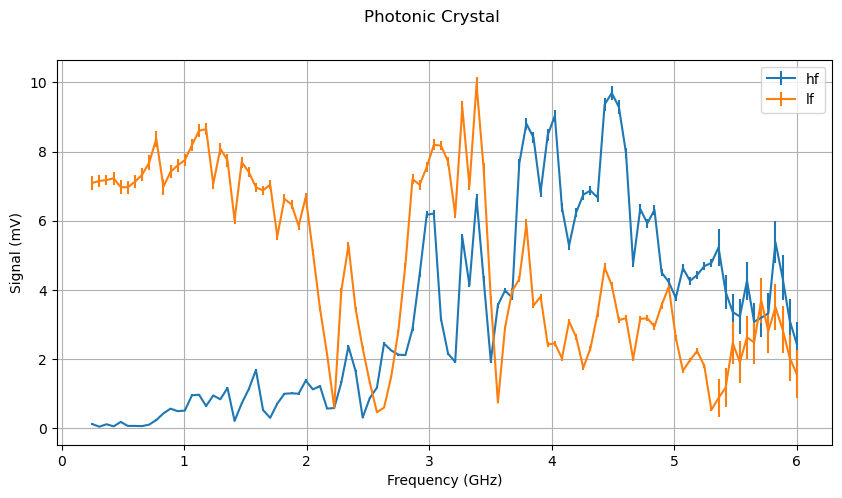

In [ ]:
data = pd.read_csv('HF_LNA_BOX_R18.txt')
data2 = pd.read_csv('LF_LNA_BOX_R19.txt')


fig, ax = plt.subplots()
fig.suptitle('Photonic Crystal')
ax.grid(True)

def pplot(data, label):
    plt.errorbar(data['Frequency (GHz)'], data['Peak (mV)'], yerr=data['Noise (mV)'], fmt='-', label=label)

# plot(LNAPCR0, ax, 0)

pplot(data, "hf")
pplot(data2, "lf")



# set y scale to logarithmic
# ax.set_yscale('log')
ax.set_xlabel('Frequency (GHz)')
ax.set_ylabel('Signal (mV)')
ax.legend()